<a href="https://colab.research.google.com/github/ADiti16Sengar/DL-CHE/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [37]:
data = pd.read_csv('Adsorption_Data.csv')

X = data.drop('Adorption Capacity(output)', axis=1)
y = data['Adorption Capacity(output)']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [40]:
X_train

array([[ 0.8743226 ,  0.61048135, -0.12587417, -1.02760475, -0.05307541],
       [-1.53647626, -1.03537253, -0.44318199,  0.20356227, -0.61802952],
       [-1.67753364, -1.2147284 , -1.2508746 , -0.39663165, -0.77632891],
       [ 0.91599865,  1.56001243,  0.3068183 , -0.33287478, -0.45003985],
       [ 0.8807343 , -0.33904974, -0.35664349, -1.02760475,  0.45575742],
       [-0.00728602,  0.39947444, -0.270105  , -1.04739136, -0.64784862],
       [ 0.55373765,  2.0875297 ,  1.05681859,  0.8037562 , -0.77516907],
       [-1.47556512, -0.59225802, -0.270105  ,  0.52014808, -0.75739733],
       [ 0.83264656,  1.66551588, -0.47202815, -0.36585247,  0.49691302],
       [ 0.83264656,  1.03249516, -0.8470283 , -0.11961907, -0.77255008],
       [ 0.90958695, -0.33904974, -0.41433582,  0.12221731,  1.1404369 ],
       [ 0.32932818,  0.05131304,  1.11451092, -1.01441367, -0.37483735],
       [-0.30863588,  0.91644136,  0.24912597,  0.02768127,  1.86253055],
       [ 0.67876578,  0.29397099, -1.3

In [41]:
X_train.shape[1]

5

In [42]:
model = Sequential()
model.add(Dense(9, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1))

In [43]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))

In [53]:
# Train the model
#early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, batch_size=16)

Epoch 1/1000
2/2 [==============================] - 0s 94ms/step - loss: 22.4299 - val_loss: 36.4814
Epoch 2/1000
2/2 [==============================] - 0s 40ms/step - loss: 22.4260 - val_loss: 36.4825
Epoch 3/1000
2/2 [==============================] - 0s 32ms/step - loss: 22.4226 - val_loss: 36.4838
Epoch 4/1000
2/2 [==============================] - 0s 31ms/step - loss: 22.4195 - val_loss: 36.4852
Epoch 5/1000
2/2 [==============================] - 0s 34ms/step - loss: 22.4150 - val_loss: 36.4872
Epoch 6/1000
2/2 [==============================] - 0s 33ms/step - loss: 22.4133 - val_loss: 36.4901
Epoch 7/1000
2/2 [==============================] - 0s 31ms/step - loss: 22.4097 - val_loss: 36.4932
Epoch 8/1000
2/2 [==============================] - 0s 36ms/step - loss: 22.4063 - val_loss: 36.4961
Epoch 9/1000
2/2 [==============================] - 0s 36ms/step - loss: 22.4018 - val_loss: 36.4990
Epoch 10/1000
2/2 [==============================] - 0s 33ms/step - loss: 22.4000 - val_los

In [54]:
test_loss = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 28ms/step - loss: 11.7453


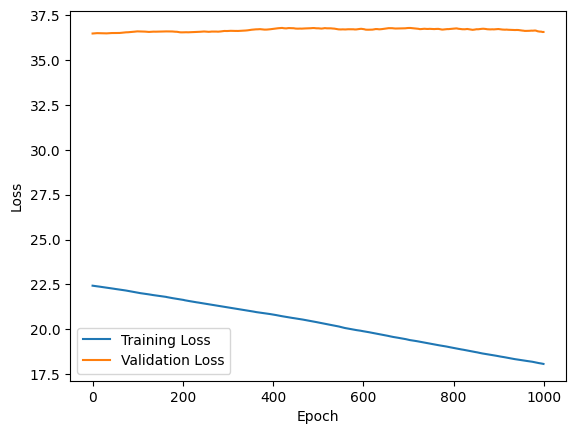

In [55]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
print(len(model.layers))

# Get the weights of the first layer
layer_weights = model.layers[0].get_weights()
print(layer_weights[0].shape)

# Check the shape of X_train
print(X_train.shape)

3
(5, 64)
(22, 5)


In [56]:
neurons = [9, 16, 32, 64, 128]
learning_rates = [0.001, 0.01, 0.1, 1]
results = []
for n in neurons:
    for lr in learning_rates:
        model = Sequential()
        model.add(Dense(n, activation='relu', input_dim=X_train.shape[1]))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lr))
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=2, callbacks=[early_stop])
        test_loss = model.evaluate(X_test, y_test)
        results.append({'neurons': n, 'lr': lr, 'test_loss': test_loss})

Epoch 1/100
11/11 [==============================] - 1s 30ms/step - loss: 60.5600 - val_loss: 67.6374
Epoch 2/100
11/11 [==============================] - 0s 30ms/step - loss: 60.1326 - val_loss: 67.3347
Epoch 3/100
11/11 [==============================] - 0s 12ms/step - loss: 59.8033 - val_loss: 67.0969
Epoch 4/100
11/11 [==============================] - 0s 21ms/step - loss: 59.5190 - val_loss: 66.8543
Epoch 5/100
11/11 [==============================] - 0s 20ms/step - loss: 59.0347 - val_loss: 66.6455
Epoch 6/100
11/11 [==============================] - 0s 14ms/step - loss: 58.6773 - val_loss: 66.4877
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: 58.3887 - val_loss: 66.4185
Epoch 8/100
11/11 [==============================] - 0s 10ms/step - loss: 57.9418 - val_loss: 66.3275
Epoch 9/100
11/11 [==============================] - 0s 8ms/step - loss: 57.8100 - val_loss: 66.3030
Epoch 10/100
11/11 [==============================] - 0s 17ms/step - loss: 57.2715 -

In [57]:
results_df = pd.DataFrame(results)
results_df

,neurons,lr,test_loss
0,9,0.001,1.913941
1,9,0.010,12.814379
2,9,0.100,6.676884
3,9,1.000,18.321537
4,16,0.001,6.067150
5,16,0.010,12.869997
6,16,0.100,4.890702
7,16,1.000,6272.533691
8,32,0.001,9.193881
9,32,0.010,14.541662


In [58]:
feature_importance = model.layers[0].get_weights()[0]
feature_importance = feature_importance.reshape(X_train.shape[1],)
plt.bar(range(X_train.shape[1]), feature_importance)
plt.xticks(range(X_train.shape[1]), X.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

ValueError: ignored

Text(0, 0.5, 'Test Loss')

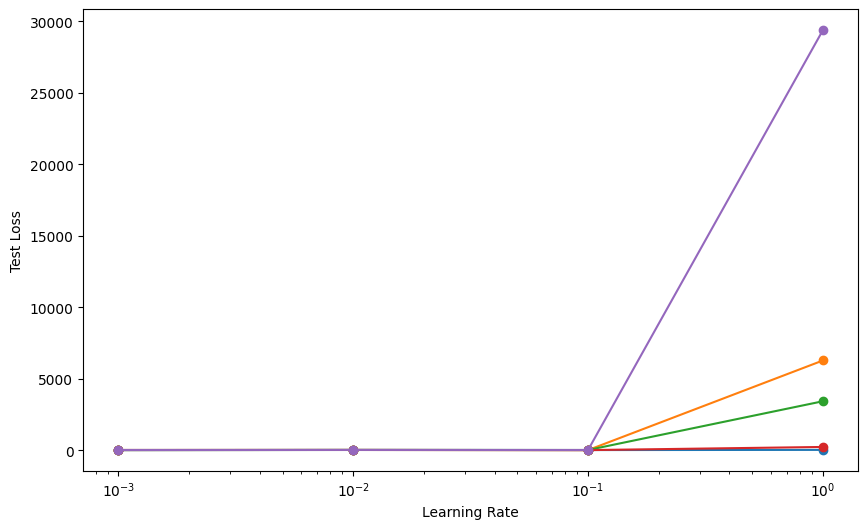

In [59]:

plt.figure(figsize=(10, 6))
for n in neurons:
    df = results_df[results_df['neurons'] == n]
    plt.plot(df['lr'], df['test_loss'], '-o', label=f'{n} neurons')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Test Loss')

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 23.5190 - accuracy: 0.0000e+00 - val_loss: 202.3101 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 71ms/step - loss: 23.4700 - accuracy: 0.0000e+00 - val_loss: 202.1859 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 49ms/step - loss: 23.4211 - accuracy: 0.0000e+00 - val_loss: 202.0613 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 64ms/step - loss: 23.3723 - accuracy: 0.0000e+00 - val_loss: 201.9364 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 46ms/step - loss: 23.3237 - accuracy: 0.0000e+00 - val_loss: 201.8114 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 53ms/step - loss: 23.2752 - accuracy: 0.0000e+00 - val_loss: 201.6862 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 73ms/step - loss: 23.2268 - accuracy: 0.00

In [ ]:
from sklearn.metrics import mean_squared_error

# evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE: ', mse)

1/1 [==============================] - 0s 86ms/step
MSE:  3.3531971660685342


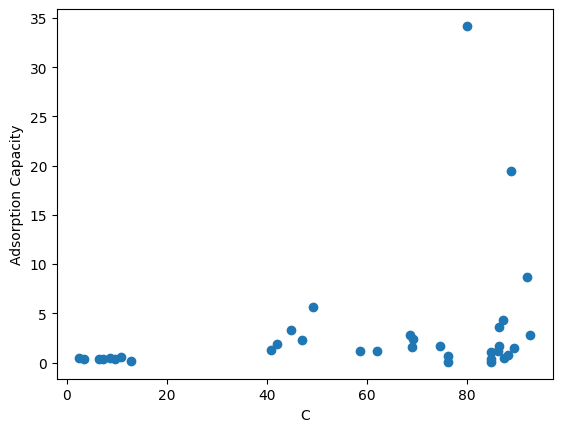

In [ ]:
C = data['C(x1)']

# plot C vs adsorption capacity
plt.scatter(C, y)
plt.xlabel('C')
plt.ylabel('Adsorption Capacity')
plt.show()

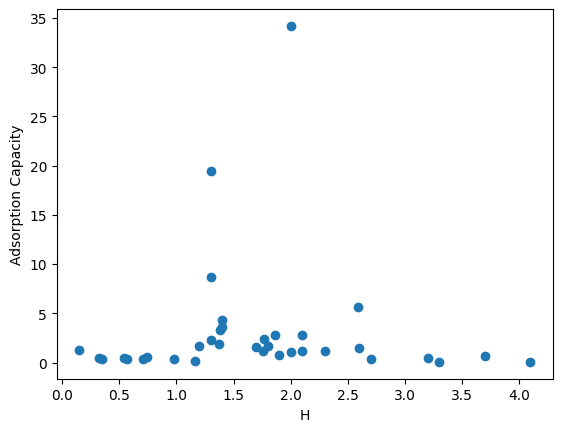

In [ ]:
H = data['H(x2)']

# plot surface area vs adsorption capacity
plt.scatter(H, y)
plt.xlabel('H')
plt.ylabel('Adsorption Capacity')
plt.show()

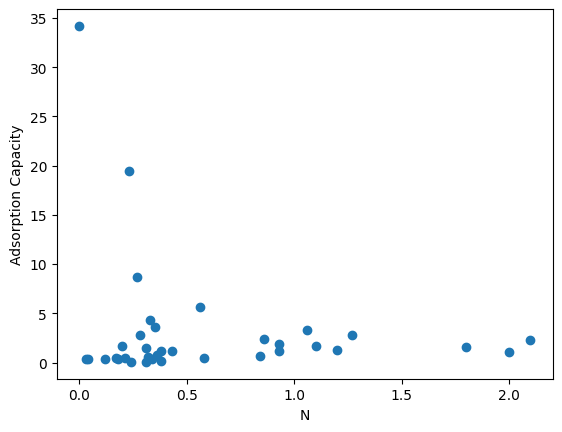

In [ ]:
N = data['N(x3)']


# plot surface area vs adsorption capacity
plt.scatter(N, y)
plt.xlabel('N')
plt.ylabel('Adsorption Capacity')
plt.show()

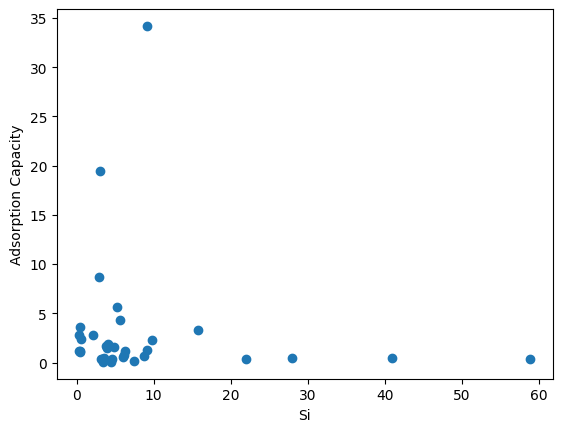

In [ ]:
Si = data['Si(x4)']


# plot surface area vs adsorption capacity
plt.scatter(Si, y)
plt.xlabel('Si')
plt.ylabel('Adsorption Capacity')
plt.show()

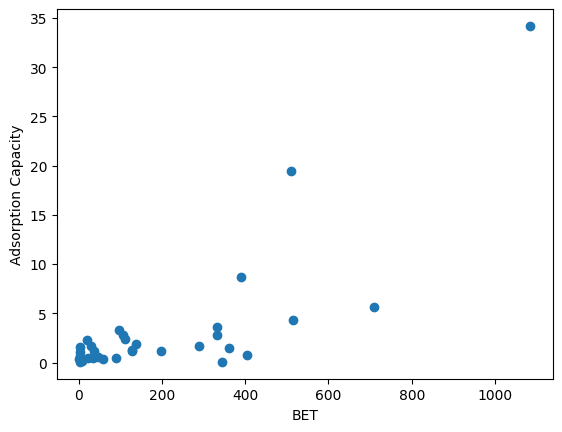

In [ ]:

BET = data['BET(x5)']

# plot surface area vs adsorption capacity
plt.scatter(BET, y)
plt.xlabel('BET')
plt.ylabel('Adsorption Capacity')
plt.show()